In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples, silhouette_score


In [2]:
df = pd.read_csv('/Users/lirunhe/Desktop/IS_407/python/Customers-2.csv')

In [3]:
df.head(10)

,Age,Annual Income,Spending Score
0,19,15000,39
1,21,15000,81
2,20,16000,6
3,23,16000,77
4,31,17000,40
5,22,17000,76
6,35,18000,6
7,23,18000,94
8,64,19000,3
9,30,19000,72


In [4]:
df.count()

Age               200
Annual Income     200
Spending Score    200
dtype: int64

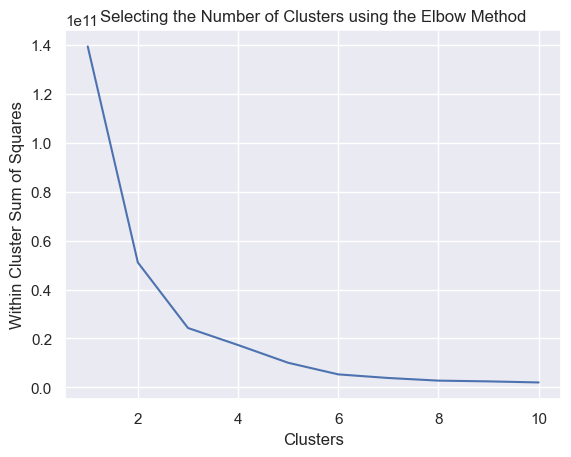

In [5]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

sns.set()
plt.plot(range(1, 11), wcss)
plt.title('Selecting the Number of Clusters using the Elbow Method')
plt.xlabel('Clusters')
plt.ylabel('Within Cluster Sum of Squares')
plt.show()

In [6]:
kmeans = KMeans(n_clusters=5).fit(df)
print("Cluster Centroid Values:")
centroids = kmeans.cluster_centers_
print(centroids)
label = kmeans.fit_predict(df)
#print (label)
kmeans_silhouette = silhouette_score(df, label)
print("Overall Average Silhouette Score:")
print(kmeans_silhouette)

Cluster Centroid Values:
[[4.37115385e+01 4.71538462e+04 5.10769231e+01]
 [3.79054054e+01 6.97567568e+04 4.98783784e+01]
 [3.65000000e+01 1.26125000e+05 4.96250000e+01]
 [3.50000000e+01 2.37894737e+04 4.92105263e+01]
 [3.82142857e+01 9.30000000e+04 5.09285714e+01]]
Overall Average Silhouette Score:
0.5556943667033476


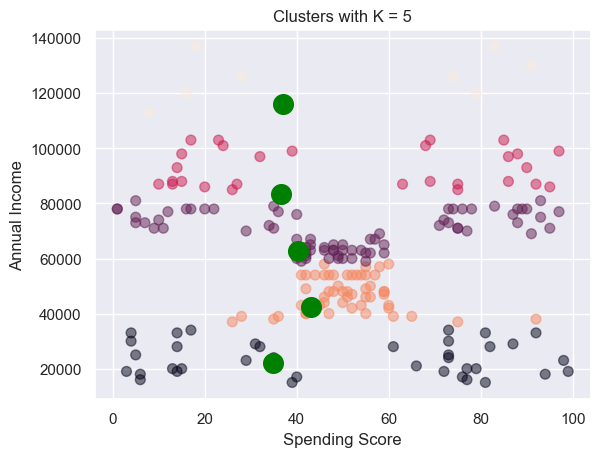

In [9]:
plt.scatter(df['Spending Score'], df['Annual Income'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='green', s=200)
plt.title('Clusters with K = 5')
plt.xlabel('Spending Score')
plt.ylabel('Annual Income')
plt.show()

In [10]:
kmeans = KMeans(n_clusters=6).fit(df)
print("Cluster Centroid Values:")
centroids = kmeans.cluster_centers_
print(centroids)
label = kmeans.fit_predict(df)
#print (label)
kmeans_silhouette = silhouette_score(df, label)
print("Overall Average Silhouette Score:")
print(kmeans_silhouette)

Cluster Centroid Values:
[[3.60185185e+01 7.83888889e+04 4.95555556e+01]
 [3.49444444e+01 2.32222222e+04 4.94444444e+01]
 [4.15200000e+01 6.04600000e+04 5.00600000e+01]
 [3.65000000e+01 1.26125000e+05 4.96250000e+01]
 [4.38157895e+01 4.32105263e+04 5.09736842e+01]
 [3.81428571e+01 9.91428571e+04 5.33571429e+01]]
Overall Average Silhouette Score:
0.5931698191202631


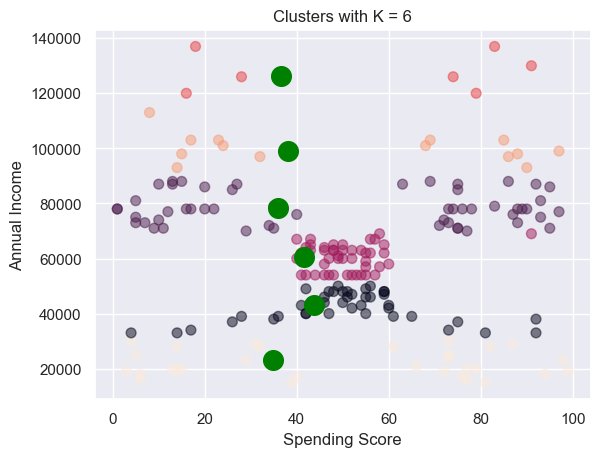

In [11]:
plt.scatter(df['Spending Score'], df['Annual Income'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='green', s=200)
plt.title('Clusters with K = 6')
plt.xlabel('Spending Score')
plt.ylabel('Annual Income')
plt.show()

In [12]:
kmeans = KMeans(n_clusters=5).fit(df)
labels = kmeans.fit_predict(df)
unique, counts = np.unique(labels, return_counts=True)
for cluster_id, count in zip(unique, counts):
    print(f"Cluster {cluster_id}: {count} points")

Cluster 0: 48 points
Cluster 1: 48 points
Cluster 2: 38 points
Cluster 3: 8 points
Cluster 4: 58 points


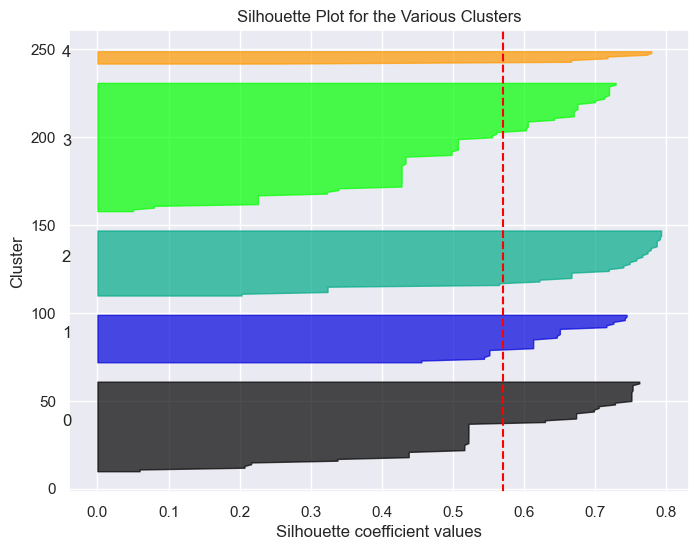

In [13]:
kmeans = KMeans(n_clusters=5, random_state=42)
labels = kmeans.fit_predict(df)
silhouette_vals = silhouette_samples(df, labels)
n_clusters = len(np.unique(labels))
y_lower = 10
plt.figure(figsize=(8, 6))

for i in range(n_clusters):
    # Collect silhouette values for samples in cluster i, sort them
    ith_cluster_silhouette_values = silhouette_vals[labels == i]
    ith_cluster_silhouette_values.sort()
    
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    
    color = plt.cm.nipy_spectral(float(i) / n_clusters)
    plt.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)
    
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10  # 10 for spacing between plots

plt.axvline(x=silhouette_score(df, labels), color="red", linestyle="--")
plt.xlabel("Silhouette coefficient values")
plt.ylabel("Cluster")
plt.title("Silhouette Plot for the Various Clusters")
plt.show()

In [14]:
kmeans = KMeans(n_clusters=6).fit(df)
labels = kmeans.fit_predict(df)
unique, counts = np.unique(labels, return_counts=True)
for cluster_id, count in zip(unique, counts):
    print(f"Cluster {cluster_id}: {count} points")

Cluster 0: 32 points
Cluster 1: 54 points
Cluster 2: 42 points
Cluster 3: 8 points
Cluster 4: 50 points
Cluster 5: 14 points


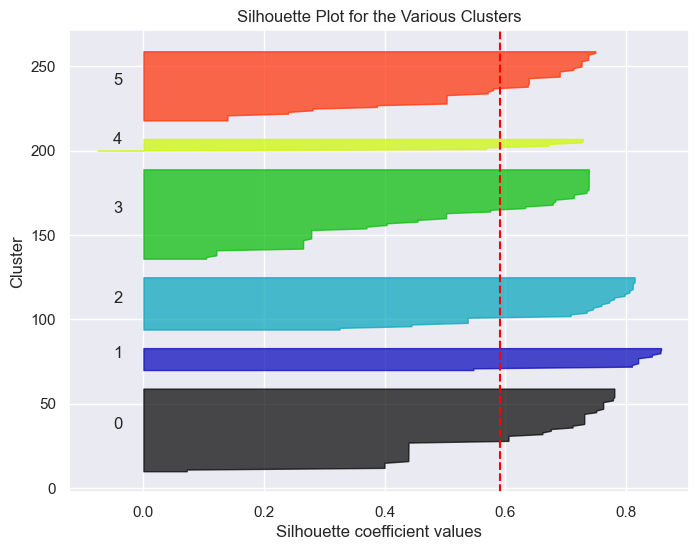

In [15]:
kmeans = KMeans(n_clusters=6, random_state=42)
labels = kmeans.fit_predict(df)
silhouette_vals = silhouette_samples(df, labels)
n_clusters = len(np.unique(labels))
y_lower = 10
plt.figure(figsize=(8, 6))

for i in range(n_clusters):
    # Collect silhouette values for samples in cluster i, sort them
    ith_cluster_silhouette_values = silhouette_vals[labels == i]
    ith_cluster_silhouette_values.sort()
    
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    
    color = plt.cm.nipy_spectral(float(i) / n_clusters)
    plt.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)
    
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10  # 10 for spacing between plots

plt.axvline(x=silhouette_score(df, labels), color="red", linestyle="--")
plt.xlabel("Silhouette coefficient values")
plt.ylabel("Cluster")
plt.title("Silhouette Plot for the Various Clusters")
plt.show()